<a href="https://colab.research.google.com/github/belanasaikiran/Team-6-Big-Data-Project/blob/main/Car_Make_Model_Detection_Sai_Kiran_Cropped_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Model Detection:

### Team 6:

## Todo:
- [x] Import the DataSet.
- [x] Preprocessing
- [ ] Feature Selection
- [ ] Model Selection
- [ ] Training the Model

In [6]:
# !rm -r DataSet/ A Simple reset call to delete DataSet folder. Use it at caution

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!unzip gdrive/MyDrive/DataSet/DataSet.zip > /dev/null # output to null

Checking if image dataset is loaded

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('DataSet/images/cars_train/00001.jpg')
img

In [7]:
print(img.width, img.height)

600 400


In [8]:
import numpy as np
import pandas as pd

In [9]:
metadata = pd.read_csv("DataSet/data/meta.csv")

In [22]:
print("Meta Data: \n")
print("Head:")
print(metadata.head())
print("\n Info:")
print(metadata.info())
print("\n Columns:")
print(metadata.columns)

Meta Data: 

Head:
   Unnamed: 0                  class_name
0           1  AM General Hummer SUV 2000
1           2         Acura RL Sedan 2012
2           3         Acura TL Sedan 2012
3           4        Acura TL Type-S 2008
4           5        Acura TSX Sedan 2012

 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  196 non-null    int64 
 1   class_name  196 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None

 Columns:
Index(['Unnamed: 0', 'class_name'], dtype='object')


## Load the Train & Test Datasets

### Train Data

In [23]:
train_data = pd.read_csv("DataSet/data/train.csv")

print("\n Train Data: \nHead: ")
train_data.head()
print("\nDescribe:")
print(train_data.describe())
print("\nInfo:")
print(train_data.info())
print("\nColumns:")
print(train_data.columns)
print("\nShape:")
print(train_data.shape)


 Train Data: 
Head: 

Describe:
         Unnamed: 0            x1            y1            x2            y2  \
count  12948.000000  12948.000000  12948.000000  12948.000000  12948.000000   
mean    3451.892339     64.701189    108.592833    638.598625    416.670683   
std     2200.262018     81.774972    106.195279    409.613163    272.818630   
min        0.000000      1.000000      1.000000     76.000000     41.000000   
25%     1618.000000     19.000000     42.000000    394.000000    250.000000   
50%     3236.500000     39.000000     80.000000    572.000000    361.000000   
75%     4906.250000     78.000000    138.000000    742.250000    475.000000   
max     8143.000000   1648.000000   1651.000000   5205.000000   3389.000000   

              class  
count  12948.000000  
mean      99.008573  
std       56.540538  
min        1.000000  
25%       50.000000  
50%       99.000000  
75%      148.000000  
max      196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

### Test Data

In [24]:
test_data = pd.read_csv("DataSet/data/test.csv") #load test data


print("\n Train Data: \nHead: ")
test_data.head()
print("\nDescribe:")
print(test_data.describe())
print("\nInfo:")
print(test_data.info())
print("\nColumns:")
print(test_data.columns)
print("\nShape:")
print(test_data.shape)


 Train Data: 
Head: 

Describe:
        Unnamed: 0           x1           y1           x2           y2  \
count  3237.000000  3237.000000  3237.000000  3237.000000  3237.000000   
mean   1618.000000    66.103491   106.835650   639.691999   417.637010   
std     934.585737    84.198376   106.736782   417.499266   279.758425   
min       0.000000     1.000000     1.000000    72.000000    49.000000   
25%     809.000000    18.000000    40.000000   389.000000   242.000000   
50%    1618.000000    39.000000    77.000000   573.000000   363.000000   
75%    2427.000000    80.000000   135.000000   763.000000   487.000000   
max    3236.000000   872.000000  1311.000000  7224.000000  3835.000000   

             class  
count  3237.000000  
mean     98.852950  
std      56.359186  
min       1.000000  
25%      51.000000  
50%      99.000000  
75%     148.000000  
max     196.000000  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 7 columns)

**Let's get an Average of images available per class**

We should get around 66 images per class with the `stanford car dataset`

In [25]:
counter = 0 #no. of images available per class in our dataset
average = 0 #average no. of images availabe for all our classes for training

for y in range(1, 197):
  for x in train_data['class']:
    if (x == y):
      # print("x, y", x, y)
      counter = counter+1;
  average = (average + counter)/y


print("Average:", average)

Average: 66.4000624886608


### Image Resising and Fixing the `fname` for one of the value in CSV

In [26]:
from PIL import Image
import os

In [27]:
# fix the file names here
train_data.loc[9998, 'fname'] = '09999.jpg'

The below function does the resizing of all our images to the specified resolution

In [28]:
# Define the resize function

def resize_image_and_bbox(image_path, new_size, bbox):
  image = Image.open(image_path)
  original_size = image.size


  resized_image = image.resize(new_size)

  scale_x = new_size[0] / original_size[0]
  scale_y = new_size[1] / original_size[1]

  resized_bbox = np.array(bbox) * [scale_x, scale_y, scale_x, scale_y]

  # Uncomment to verify the parameters when using this function
  # if(image_path == 'DataSet/images/cars_train/00001.jpg'):
  #   print("Image Size: ", original_size)
  #   print("Scale_X: ", scale_x)
  #   print("np.array(bbox): ", np.array(bbox))
  #   print("Original bbox: ", bbox)
  #   print("Resized_bbox: ", resized_bbox.tolist())

  return resized_image, resized_bbox.tolist()

resizing the images to 128x128 resolution

In [66]:
new_size = (128,128)

Creating a variable for resized data that we can use to update the bounding box information

In [67]:
train_data_resized = train_data.copy()
train_data_resized.shape

(12948, 7)

In [68]:
# train_data.head(10000)

## ***Before I resize the images, I wanna see the small resolution image available in the dataset to avoid any mis handling of images during the training phase of dataset***

In [62]:
temp_width = 190000 # some random value which should be high to compare and get the smallest width(px size) of the available images in the dataset
temp_height = 19000

smallest_width_image = ""
smallest_height_image = ""


def ImageSizeChecker():
  global temp_width, temp_height, smallest_height_image, smallest_width_image
  # print(train_data['fname'][0])
  for i in range(1, 12948):
    image_path = 'DataSet/images/cars_train/' + train_data['fname'][i]
    img = tf.keras.preprocessing.image.load_img(image_path)
    # print(img.width, img.height)
    if (img.width < temp_width):
      temp_width = img.width
      smallest_width_image = train_data['fname'][i]
      # print("Image Width Size for ", i, "th image: ",  temp_width)
    if (img.height < temp_height):
      temp_height = img.width
      smallest_height_image = train_data['fname'][i]
      # print("Image height Size for ", i, "th image: ",  temp_width)
    if i == 12947:
      print("END")
      print(temp_width, temp_height)
      print(smallest_width_image, smallest_height_image)


ImageSizeChecker()



END
78 96
00097.jpg 12942.jpg


Checking which images have low resolution

train_data name 00097.jpg
train_data name 12942.jpg


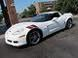

In [63]:
small_image_1 = 'DataSet/images/cars_train/' + train_data['fname'][96]
print("train_data name", train_data['fname'][96])
img1 = tf.keras.preprocessing.image.load_img(small_image_1)


small_image_2 = 'DataSet/images/cars_train/' + train_data['fname'][12941]
print("train_data name", train_data['fname'][12941])
img2 = tf.keras.preprocessing.image.load_img(small_image_2)
img1

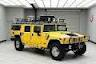

In [64]:
img2

### Resizing the Training DataSet images to 128x128 pixels:



*   Read the dataset from CSV file
*   Iterate over each image, resize it and its bounding box in CSV
*   Save the resize image
*   Update the bounding box coordinates in the new dataframe called `train_data_resized`.

> Resizing the dataset helps in training the model much faster as we deal with larger datasets




In [70]:
# dataset folder
dataset_image_folder = 'DataSet/images/cars_train/'
# process each image - resizing
for index, row in train_data.iterrows():
  image_path = dataset_image_folder + row['fname']
  bbox = [row['x1'], row['y1'], row['x2'], row['y2']]

  # resize image and box
  resized_image, resized_bbox = resize_image_and_bbox(image_path, new_size, bbox)

  #save the resized image
  save_path ='DataSet/resized_images' #setting a custom path for storing the resized data
  if not os.path.exists(save_path):
    os.makedirs(save_path)

  filename = os.path.basename(image_path)
  resized_image.save(os.path.join(save_path, filename))

  # update the dataframe with the resized bbox coordinates - updating the train_data_resized dataframe object
  train_data_resized.loc[index, ['x1', 'y1', 'x2', 'y2']] = resized_bbox


# Image Cropper Function
def ImageCropper(save_path, class_name, image_path, x1, y1,x2, y2):
  im = Image.open(image_path);
  croppedImage = im.crop((x1, y1, x2, y2))

  # print("Cropping Finished")
  filename = os.path.basename(image_path)
  # class_image_save_path = save_path + "/" + str(class_name) + "/" # this line separates all the images to separate folders according to the class no.
  class_image_save_path = save_path + "/"

  # print(class_image_save_path+filename)

  #save the resized image
  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  croppedImage.save(os.path.join(class_image_save_path, filename))



In [71]:
#!ls DataSet/images/cars_train #uncomment to see the show the no. of images we have

In [72]:
#!ls DataSet/resized_images/ #let's see the count of resized images.

In [73]:
train_data_resized.head()

,Unnamed: 0,x1,y1,x2,y2,class,fname
0,0,8.320000,37.120000,121.386667,120.000000,14,00001.jpg
1,1,5.120000,21.997037,123.448889,111.312593,3,00002.jpg
2,2,17.000000,29.066667,120.200000,101.600000,91,00003.jpg
3,3,37.851429,36.294372,90.453333,101.217893,134,00004.jpg
4,4,12.444444,42.666667,118.222222,117.333333,106,00005.jpg


## Check the resized image.

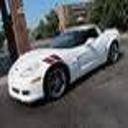

In [77]:
scaled_img = tf.keras.preprocessing.image.load_img('DataSet/resized_images/00097.jpg')
scaled_img

Split data into Training and validation set

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
X_train = train_data_resized.drop(columns=["class"])  # Features
y_train = train_data_resized["class"]  # Target variable which in our case is class

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) #training set 80% validation set 20%

In [ ]:
X_train.shape

(10358, 6)

In [ ]:
X_val.shape

(2590, 6)

In [ ]:
y_train.shape

(10358,)

In [ ]:
y_val.shape

(2590,)

In [ ]:
X_train.head()

,Unnamed: 0,x1,y1,x2,y2,fname
6821,6821,2.750000,31.000000,121.875000,108.666667,06822.jpg
2498,2498,7.979644,42.406504,119.368957,113.951220,02499.jpg
1851,1851,5.400000,5.600000,125.200000,115.466667,01852.jpg
8128,8128,42.320000,49.386667,104.480000,86.186667,08129.jpg
4533,4533,5.979239,25.185984,122.906574,113.854447,04534.jpg


#Prepare the Data for Machine Learning Algorithms

Checking we have any missing value

In [ ]:
sample_incomplete_rows = train_data_resized[train_data_resized.isnull().any(axis=1)].head() #maybe we don't have any missing data
pd.set_option('display.max_columns', None)
sample_incomplete_rows

,Unnamed: 0,x1,y1,x2,y2,class,fname


#Calculate the width and height of Bounding Boxes

In [ ]:
# Calculate width of bounding boxes
train_data_resized['bbox_width'] = train_data_resized['x2'] - train_data_resized['x1']

# Calculate height of bounding boxes
train_data_resized['bbox_height'] = train_data_resized['y2'] - train_data_resized['y1']

# Print the first few rows to verify the new features
print(train_data_resized[['bbox_width', 'bbox_height']].head())

   bbox_width  bbox_height
0  113.066667    82.880000
1  118.328889    89.315556
2  103.200000    72.533333
3   52.601905    64.923521
4  105.777778    74.666667


#Calculate summary statistics for numerical features to determine should we apply Normalization and Standardization


In [ ]:
# Calculate summary statistics for numerical features
summary_statistics = train_data_resized.describe()

# Print summary statistics to check the scale of features
# print(summary_statistics)

### Cropping the images using bounding boxes and separating the images into their respective folders accoringly.

> This step helps in training the transfer learning model much easier.

In [ ]:
!rm -r DataSet/cropped_images/

rm: cannot remove 'DataSet/cropped_images/': No such file or directory


In [ ]:
# Image Cropper Function
def ImageCropper(save_path, class_name, image_path, x1, y1,x2, y2):
  im = Image.open(image_path);
  croppedImage = im.crop((x1, y1, x2, y2))

  # print("Cropping Finished")
  filename = os.path.basename(image_path)
  # class_image_save_path = save_path + "/" + str(class_name) + "/" # this line separates all the images to separate folders according to the class no.
  class_image_save_path = save_path + "/"

  # print(class_image_save_path+filename)

  #save the resized image
  if not os.path.exists(class_image_save_path):
    os.makedirs(class_image_save_path)

  croppedImage.save(os.path.join(class_image_save_path, filename))

In [ ]:
save_path ='DataSet/cropped_images' #setting a custom path for storing the resized data

# process each image - cropping
for index, row in train_data.iterrows():

  # Call the image cropper function
  ImageCropper(save_path, train_data['class'][index] , dataset_image_folder + train_data['fname'][index], train_data['x1'][index], train_data['y1'][index], train_data['x2'][index], train_data['y2'][index])





# Load all the Images to start traning


In [ ]:
import cv2  # Or from PIL import Image  if using Pillow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Define data paths

In [ ]:
image_train_data_dir = "DataSet/cropped_images/"
# test_data_dir = "" # let's redefine it later

In [ ]:
def load_image(filepath, target_size=(224, 224)):  # Adjust target size if needed
    img = cv2.imread(filepath)  # Or img = Image.open(filepath) for Pillow
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if using OpenCV
    img = cv2.resize(img, target_size)
    return img

### Prepare Training Data

Creating a dictionary to map image filenames to their corresponding class labels

In [ ]:
image_label_map = dict(zip(train_data["fname"], train_data["class"]))  # Adjust column names if needed


###  Data Augmentation (Highly Recommended):

Create an ImageDataGenerator object to perform on-the-fly data augmentation during training, which helps prevent overfitting and improve model generalization

perform Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% for validation (optional)
)

### Load and Augment Training Data:

Use train_datagen.flow_from_directory to automatically load, preprocess, and augment images from your training directory:

Use train_datagen.flow_from_dataframe to generate batches of images and labels from your DataFrame:

In [ ]:
train_generator = train_datagen.flow_from_directory(
    image_train_data_dir,
    target_size=(224, 224),  # Adjust target size if needed
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical',  # Multi-class classification
    subset='training'  # Use 'validation' for validation split
)

Found 0 images belonging to 0 classes.


In [ ]:
# Convert "class" column to string before using flow_from_dataframe
train_data['class'] = train_data['class'].astype(str)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=image_train_data_dir,  # Point to the image directory
    x_col="fname",  # Column containing image filenames (adjust if needed)
    y_col="class",  # Column containing class labels (adjust if needed)
    target_size=(224, 224),  # Adjust target size if needed
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical',  # Multi-class classification
    shuffle=True,  # Shuffle data for better training
    function=load_image  # Use the custom load_image function
)

Found 12948 validated image filenames belonging to 196 classes.


# PENDING FROM HERE

## Imporing ResNet50 to the Transfer learning as the training data for each class is minimal in our dataset

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model


In [ ]:
# Load the pre-trained ResNet50 model, excluding the top (classification) layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# Freeze the base model layers (optional, adjust as needed)
base_model.trainable = False

In [ ]:
# Add your custom layers for car make/model classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(196, activation='softmax')(x)

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model for training with your specific optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model on your car image dataset (data preparation not shown here)
# model.fit(train_generator, your_training_labels, epochs=10)

In [ ]:
# Use the trained model for car make/model prediction on new images
# predictions = model.predict(your_new_image)

In [ ]:
# Train the model on the training data
model.fit(
    train_generator,
    epochs=10,  # Adjust the number of epochs as needed
    steps_per_epoch=len(train_generator)  # Adjust if using validation split
)

Epoch 1/10
405/405 [==============================] - 191s 448ms/step - loss: 5.7296 - accuracy: 0.0060
Epoch 2/10
405/405 [==============================] - 181s 447ms/step - loss: 5.2860 - accuracy: 0.0087
Epoch 3/10
405/405 [==============================] - 179s 441ms/step - loss: 5.2890 - accuracy: 0.0089
Epoch 4/10
405/405 [==============================] - 178s 441ms/step - loss: 5.2859 - accuracy: 0.0089
Epoch 5/10
405/405 [==============================] - 178s 439ms/step - loss: 5.2809 - accuracy: 0.0089
Epoch 6/10
405/405 [==============================] - 178s 438ms/step - loss: 5.2807 - accuracy: 0.0088
Epoch 7/10
405/405 [==============================] - 178s 439ms/step - loss: 5.2735 - accuracy: 0.0089
Epoch 8/10
405/405 [==============================] - 179s 442ms/step - loss: 5.2751 - accuracy: 0.0090
Epoch 9/10
405/405 [==============================] - 183s 450ms/step - loss: 5.2759 - accuracy: 0.0090
Epoch 10/10
118/405 [=======>......................] - ETA: 2:08

> **NOTE:** It is best to have validation set for evaluating the performance